# Spin-Orbit Interaction

## Imports

In [1]:
from IPython.display import display

In [2]:
from sympy import init_printing
init_printing(use_latex=True)

In [3]:
from sympy import factor, pi, S, Sum, symbols
from sympy.physics.quantum.spin import (
    Jminus, Jx, Jz, J2, J2Op, JzKet, JzKetCoupled, Rotation, WignerD, couple, uncouple
)
from sympy.physics.quantum import (
    Dagger, hbar, qapply, represent, TensorProduct
)

## Symbolic calculation

If we start with a hydrogen atom, i.e. a nucleus of charge $Ze$ orbited by a single electron of charge $e$ with reduced mass $\mu$, ignoring energy from center-of-mass motion, we can write the Hamiltonian in terms of the relative momentum, $p$, and position, $r$, as:

$$H=\frac{p^2}{2\mu} - \frac{Ze^2}{r}$$

The resulting eigenfunctions have a seperate radial and angular compents, $\psi=R_{n,l}(r)Y_{l,m}(\phi,\theta)$. While the radial component is a complicated function involving Laguere polynomials, the radial part is the familiar spherical harmonics with orbital angular momentum $\vec{L}$, where $l$ and $m$ give the orbital angular momentum quantum numbers. We represent this as a angular momentum state:

In [4]:
l, ml = symbols('l m_l')
orbit = JzKet(l, ml)
orbit

Now, the spin orbit interaction arises from the electron experiencing a magnetic field as it orbits the electrically charged nucleus. This magnetic field is:

$$\vec{B} = \frac{1}{c}\frac{Ze\vec{v}\times\vec{r}}{r^3} = \frac{Ze\vec{p}\times\vec{r}}{mcr^3}=\frac{Ze\vec{L}}{mc\hbar r^3}$$

Then the spin-orbit Hamiltonian can be written, using the electron's magnetic dipole moment $\mu$, as:

$$H_{SO} = -\vec{\mu}\cdot\vec{B} = -\left(-\frac{g\mu_B \vec{S}}{\hbar}\right)\cdot\left(\frac{Ze\vec{L}}{mc\hbar r^3}\right)$$

Ignoring the radial term:

$$\propto \vec{L}\cdot\vec{S} = J^2 - L^2 - S^2$$

for $\vec{J}$, the coupled angular momentum.

The electron spin angular momentum is given as $\vec{S}$, where the spin wavefunction is:

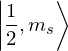

In [5]:
ms = symbols('m_s')
spin = JzKet(S(1)/2, ms)
spin

From this we build our uncoupled state:

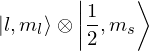

In [6]:
state = TensorProduct(orbit, spin)
state

For clarity we will define $L^2$ and $S^2$ operators. These behave the same as `J2`, they only display differently.

In [7]:
L2 = J2Op('L')
S2 = J2Op('S')

We also have the spin-orbit Hamiltonian:

In [8]:
hso = J2 - TensorProduct(L2, 1) - TensorProduct(1, S2)
hso

Now we apply this to our state:

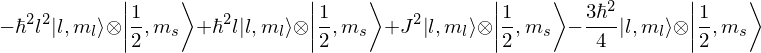

In [9]:
apply1 = qapply(hso*state)
apply1

Note this has not applied the coupled $J^2$ operator to the states, so we couple the states and apply again:

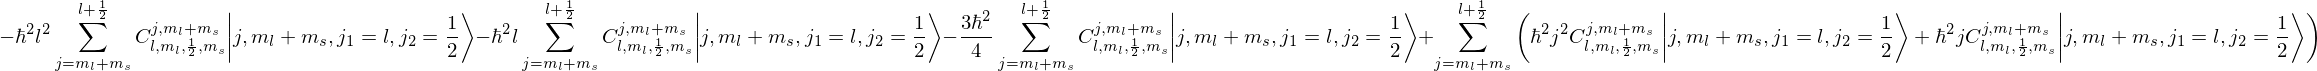

In [10]:
apply2 = qapply(couple(apply1))
apply2

We now collect the terms of the sum, since they share the same limits, and factor the result:

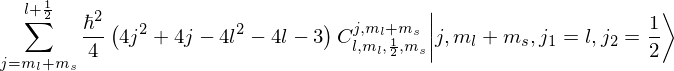

In [11]:
subs = []
for sum_term in apply2.atoms(Sum):
    subs.append((sum_term, sum_term.function))
    limits = sum_term.limits
final = Sum(factor(apply2.subs(subs)), limits)
final

This gives us the modification of the angular part of the spin-orbit Hamiltonian. We see there is now the new $j$ quantum number in the coupled states, which we see from looking at the equation will have values $l\pm \frac{1}{2}$, and $m_j=m_l + m_s$. We still have the $l$ and $s$ quantum numbers.